## Project : 1 Ames Housing Data

#### Objective : perform the exploratory data analysis on the data.

---

### Data Analysis Questions with Pandas

1. **Missing Values Check**

   * Which columns have the most missing values, and how many missing values are there in each?

2. **Distribution of Target Variable**

   * What is the distribution of `SalePrice` (mean, median, standard deviation, skewness)?

3. **Categorical Frequency Analysis**

   * What are the most common `Neighborhood`s in the dataset, and how many houses are sold in each?

4. **Price by Neighborhood**

   * What is the average `SalePrice` in each `Neighborhood`, and which neighborhoods are the most/least expensive?

5. **Impact of House Quality**

   * How does `Overall Qual` (Overall Quality) correlate with `SalePrice`?

6. **House Age and Price**

   * What is the relationship between `Year Built` and `SalePrice`? Do newer houses generally sell for higher prices?

7. **Garage Effect**

   * Does having a garage (`Garage Type`, `Garage Area`, `Garage Cars`) significantly impact the `SalePrice`?

8. **Living Area vs Price**

   * What is the correlation between `Gr Liv Area` (Above-ground living area in square feet) and `SalePrice`?

9. **Effect of Bathrooms & Bedrooms**

   * How do the number of bathrooms (`Full Bath` + `Half Bath` + `Bsmt Full Bath`) and bedrooms (`Bedroom AbvGr`) affect `SalePrice`?

10. **Seasonal Trend**

* Do houses sold in certain months (`Mo Sold`) or years (`Yr Sold`) tend to have higher/lower `SalePrice`?

---


In [1]:
import pandas as pd
import numpy as np

In [82]:
data = pd.read_csv("/Users/rohanpatil/Desktop/Rohan Patil - DSAI/Course Notebooks/DATA/Ames_Housing_Data.csv")

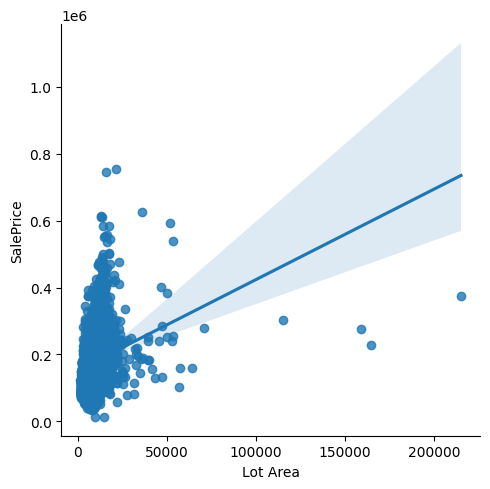

In [83]:
sns.lmplot(x='Lot Area', y='SalePrice', data=data)

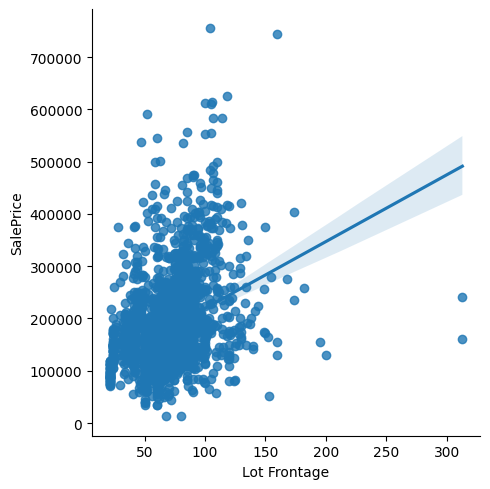

In [84]:
sns.lmplot(x='Lot Frontage', y='SalePrice', data=data)

In [3]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
data['SalePrice'] # Quantitative : Discrete data

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

In [6]:
data.shape

(2930, 81)

In [7]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

## 1.Missing Values Check

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

<Axes: >

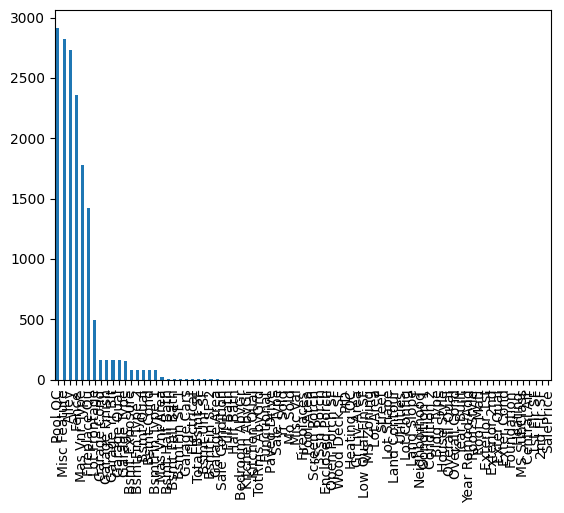

In [19]:
data.isna().sum().sort_values(ascending=False).plot(kind='bar')

## 2. Sales price distribution

In [23]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

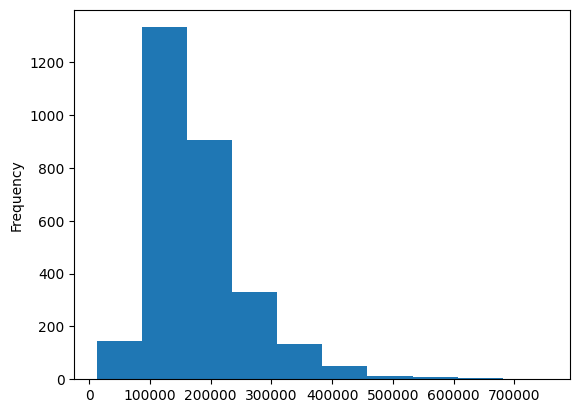

In [24]:
data['SalePrice'].plot(kind='hist')

## 3. Neighborhood Analysis

<Axes: xlabel='Neighborhood'>

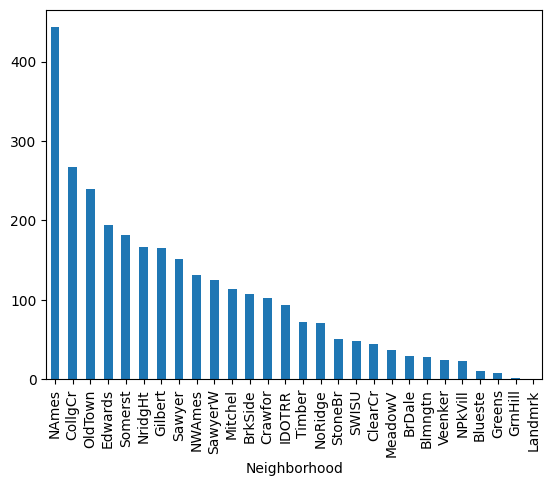

In [27]:
data['Neighborhood'].value_counts().plot(kind='bar')

## 4.Price by Neighborhood

In [28]:
data.groupby(['Neighborhood'])['SalePrice'].mean()

Neighborhood
Blmngtn    196661.678571
Blueste    143590.000000
BrDale     105608.333333
BrkSide    124756.250000
ClearCr    208662.090909
CollgCr    201803.434457
Crawfor    207550.834951
Edwards    130843.381443
Gilbert    190646.575758
Greens     193531.250000
GrnHill    280000.000000
IDOTRR     103752.903226
Landmrk    137000.000000
MeadowV     95756.486486
Mitchel    162226.631579
NAmes      145097.349887
NPkVill    140710.869565
NWAmes     188406.908397
NoRidge    330319.126761
NridgHt    322018.265060
OldTown    123991.891213
SWISU      135071.937500
Sawyer     136751.152318
SawyerW    184070.184000
Somerst    229707.324176
StoneBr    324229.196078
Timber     246599.541667
Veenker    248314.583333
Name: SalePrice, dtype: float64

## 5. Impact of House Quality

In [ ]:
data['Overall Qual'].unique() # Qualitative : Ordinal data

array([ 6,  5,  7,  8,  9,  4,  3,  2, 10,  1])

In [32]:
data[['Overall Qual', 'SalePrice']].corr()

,Overall Qual,SalePrice
Overall Qual,1.000000,0.799262
SalePrice,0.799262,1.000000


<Axes: xlabel='Overall Qual'>

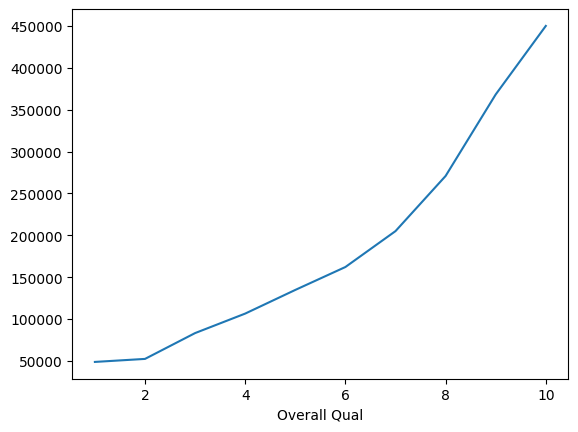

In [34]:
data.groupby(['Overall Qual'])['SalePrice'].mean().plot()

## 6.House Age and Price

<Axes: xlabel='Year Built'>

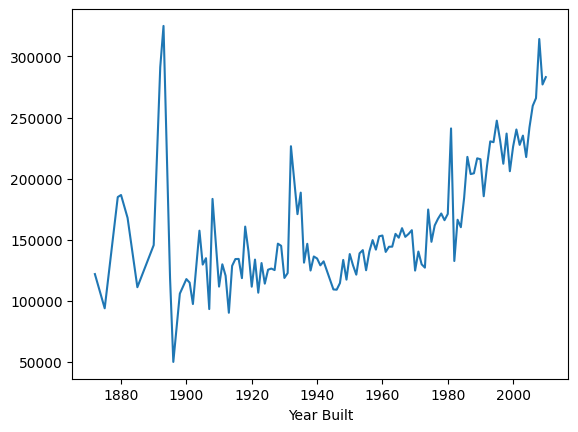

In [37]:
data.groupby(['Year Built'])['SalePrice'].mean().plot()

## 7. Garage and Sales Price 

In [39]:
data[['Garage Area','SalePrice']].corr()

,Garage Area,SalePrice
Garage Area,1.000000,0.640401
SalePrice,0.640401,1.000000


In [41]:
data['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

<Axes: xlabel='Garage Type'>

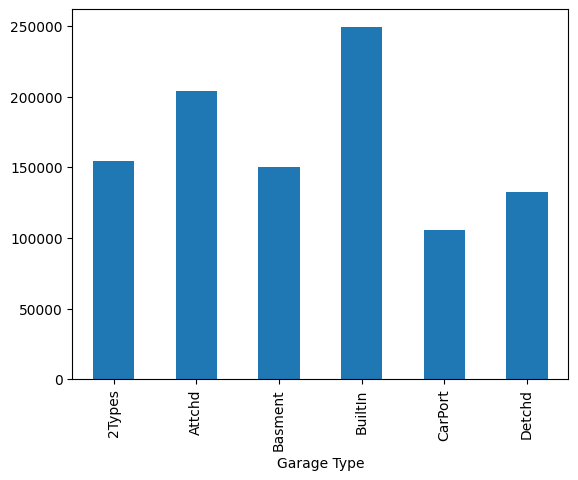

In [44]:
data.groupby(['Garage Type'])['SalePrice'].mean().plot(kind='bar')

## 8. Living Area and Price

In [45]:
data[['Gr Liv Area','SalePrice']].corr()

,Gr Liv Area,SalePrice
Gr Liv Area,1.00000,0.70678
SalePrice,0.70678,1.00000


## 9. Bathroom and Price

In [47]:
data['Half Bath'].unique()

array([0, 1, 2])

In [48]:
data['Full Bath'].unique()

array([1, 2, 3, 0, 4])

In [ ]:
data['Lo']

In [55]:
data.groupby(['Full Bath'])['Lot Area'].mean()

Full Bath
0    13980.416667
1     9134.434750
2    10736.783943
3    16284.968750
4     8867.500000
Name: Lot Area, dtype: float64

## 10. Seasonal trend and Price

<Axes: xlabel='Mo Sold'>

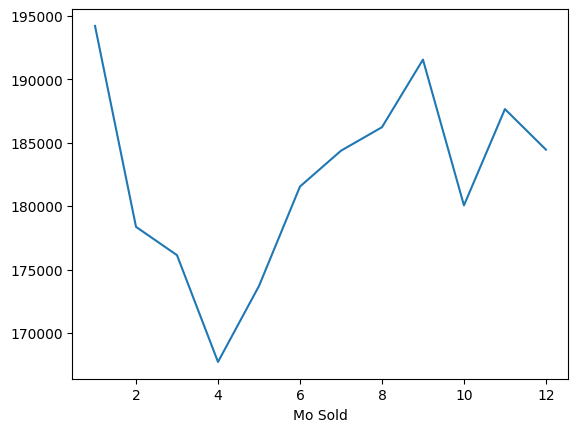

In [57]:
data.groupby(['Mo Sold'])['SalePrice'].mean().plot(kind='line')

In [58]:
data.groupby(['Year Built','Mo Sold'])['SalePrice'].mean()

Year Built  Mo Sold
1872        12         122000.000000
1875        5           94000.000000
1879        2          185000.000000
1880        5          226159.666667
            6          127500.000000
                           ...      
2009        10         370878.000000
            12         263435.000000
2010        3          187000.000000
            4          267916.000000
            6          394432.000000
Name: SalePrice, Length: 895, dtype: float64

<Axes: title={'center': 'Average Sale Price by Month and Year Built'}, xlabel='Month Sold', ylabel='Average Sale Price'>

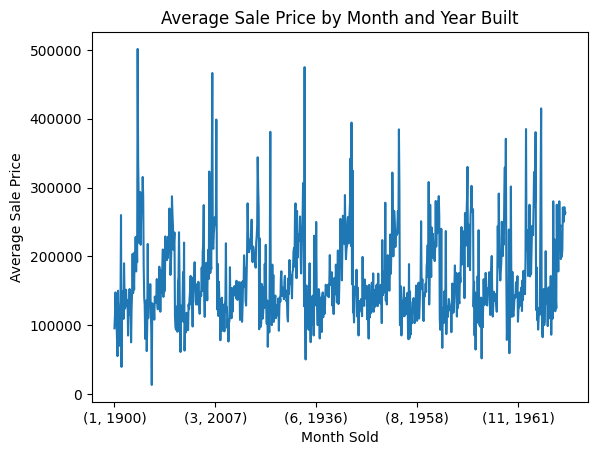

In [61]:
from turtle import title


data.groupby(['Mo Sold','Year Built'])['SalePrice'].mean().plot(xlabel='Month Sold', ylabel='Average Sale Price', title='Average Sale Price by Month and Year Built')

## 1. Data Extraction

In [25]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [39]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [55]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [64]:
x = data[['Lot Area','Gr Liv Area']]

In [65]:
x

,Lot Area,Gr Liv Area
0,31770,1656
1,11622,896
2,14267,1329
3,11160,2110
4,13830,1629
...,...,...
2925,7937,1003
2926,8885,902
2927,10441,970
2928,10010,1389


In [66]:
y = data['SalePrice'].values

In [67]:
y

array([215000, 105000, 172000, ..., 132000, 170000, 188000])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train , y_test =  train_test_split(x,y, test_size=0.3, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train , y_train )

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
y_pred = model.predict(x_test)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
mean_absolute_error(y_test, y_pred)

39417.37498216522

In [75]:
mean_squared_error(y_pred, y_test)

3423304635.92687

In [76]:
r2_score(y_test, y_pred)

0.5130038070912747

In [77]:
model.coef_, model.intercept_

(array([  0.74970836, 102.77562946]), 17089.9400091313)

In [ ]:
# salesPrice = lot front* model_coef + model_intercept

## salesPrice = Lot front * 0.74970836 + Gr Liv Ara  * 102.77562946 + 17089.9400091313

<Axes: ylabel='Frequency'>

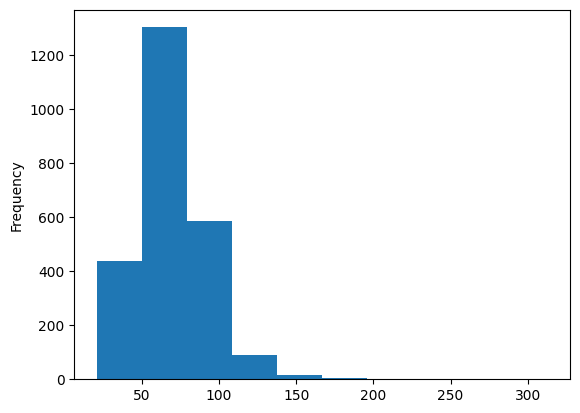

In [3]:
data['Lot Frontage'].plot(kind='hist')

In [5]:
import seaborn as sns

<Axes: ylabel='Lot Frontage'>

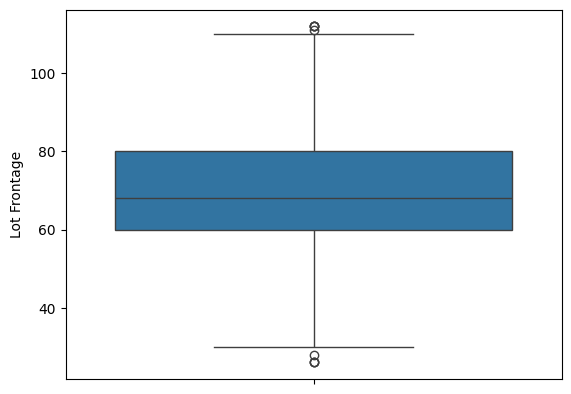

In [14]:
sns.boxplot(data['Lot Frontage'])

In [7]:
data['Lot Frontage'].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [8]:
IQR = 80 - 58

In [10]:
lower_fence = 58 - 1.5*IQR

In [11]:
upper_fence = 80 + 1.5*IQR

In [12]:
data = data[(data['Lot Frontage'] > lower_fence) & (data['Lot Frontage'] < upper_fence)]

<Axes: ylabel='Frequency'>

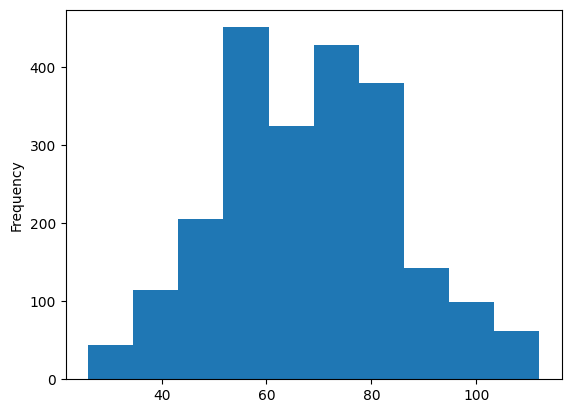

In [13]:
data['Lot Frontage'].plot(kind='hist')

In [ ]:
# IQR = Q3 - Q1
# lower bound = Q1 - 1.5*IQR
# upper bound = Q3 + 1.5*IQR


In [19]:
data['Lot Frontage'].isna().sum()

490

In [22]:
data['Lot Frontage'].median()

68.0

In [23]:
data['Lot Frontage'].fillna(data['Lot Frontage'].median())

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926     68.0
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64

## Machine learning Model

In [4]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
X = data[['Lot Area','Lot Frontage']]

In [6]:
X

,Lot Area,Lot Frontage
0,31770,141.0
1,11622,80.0
2,14267,81.0
3,11160,93.0
4,13830,74.0
...,...,...
2925,7937,37.0
2926,8885,NaN
2927,10441,62.0
2928,10010,77.0


In [7]:
y = data['SalePrice'].values

In [8]:
y

array([215000, 105000, 172000, ..., 132000, 170000, 188000])

## 2. Data Analysis

In [10]:
X['Lot Area']

0       31770
1       11622
2       14267
3       11160
4       13830
        ...  
2925     7937
2926     8885
2927    10441
2928    10010
2929     9627
Name: Lot Area, Length: 2930, dtype: int64

<Axes: xlabel='Lot Area', ylabel='Count'>

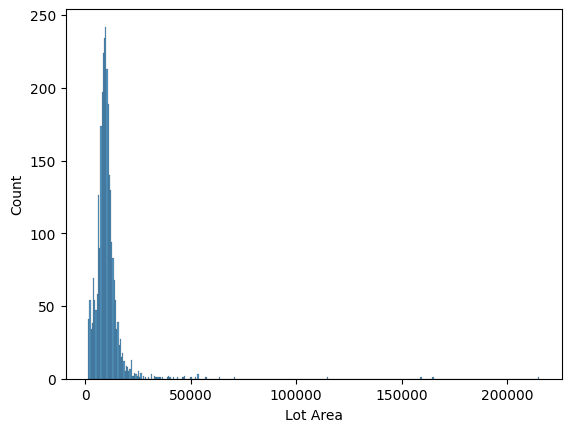

In [12]:
import seaborn as sns
sns.histplot(X['Lot Area'])

In [13]:
X['Lot Area'].describe()

count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot Area, dtype: float64

<Axes: ylabel='Lot Area'>

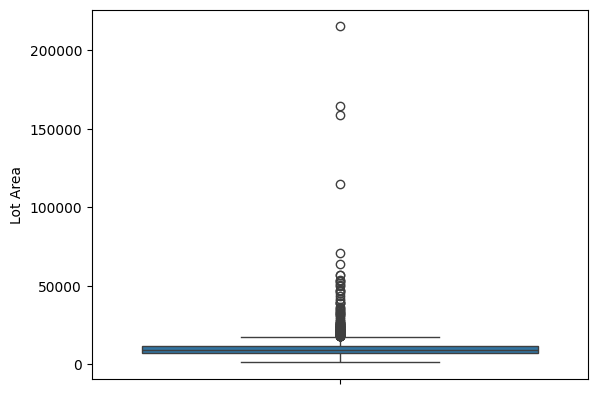

In [14]:
sns.boxplot(X['Lot Area'])

In [15]:
X['Lot Area'].isna().sum()

0

#### Lot Frontage

In [16]:
X['Lot Frontage'].isna().sum()

490

<Axes: ylabel='Lot Frontage'>

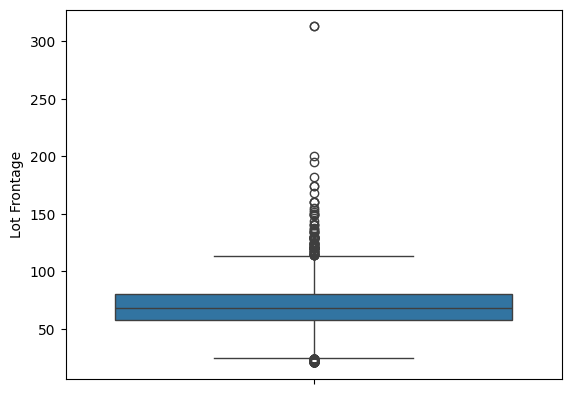

In [17]:
sns.boxplot(X['Lot Frontage'])

<Axes: xlabel='Lot Frontage', ylabel='Count'>

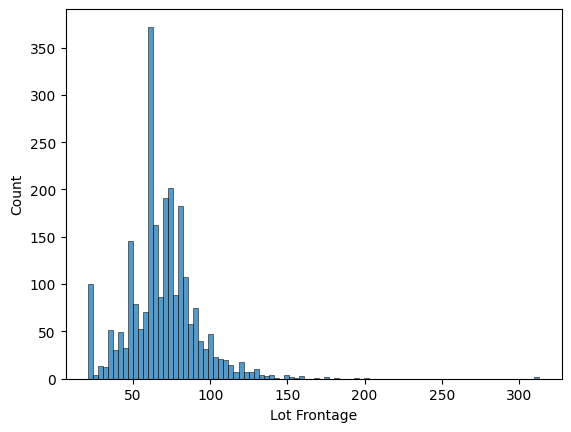

In [18]:
sns.histplot(X['Lot Frontage'])

## 3.Feature Engineering

In [20]:
X['Lot Area'].describe()

count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot Area, dtype: float64

In [21]:
q1 = 7440
q3 = 11555

IQR = q3 - q1 

lower_fence = q1 - 1.5*IQR
upper_fence = q3 + 1.5*IQR

In [30]:
X['Lot Area']  = X[X['Lot Area'].between(lower_fence, upper_fence)]['Lot Area']

/var/folders/h8/x2xfqyjs5cl005fb579670gw0000gn/T/ipykernel_86492/1333779189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lot Area']  = X[X['Lot Area'].between(lower_fence, upper_fence)]['Lot Area']


# Note : if data's distribution is skewed, impute with median(), else impute with mean().

In [34]:
X['Lot Area'].fillna(X['Lot Area'].mean(), inplace=True)

/var/folders/h8/x2xfqyjs5cl005fb579670gw0000gn/T/ipykernel_86492/711541141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lot Area'].fillna(X['Lot Area'].mean(), inplace=True)


<Axes: ylabel='Frequency'>

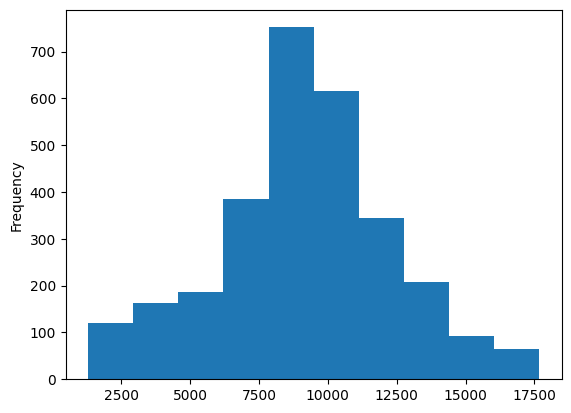

In [35]:
X['Lot Area'].plot(kind='hist')

In [38]:
X['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64

<Axes: ylabel='Frequency'>

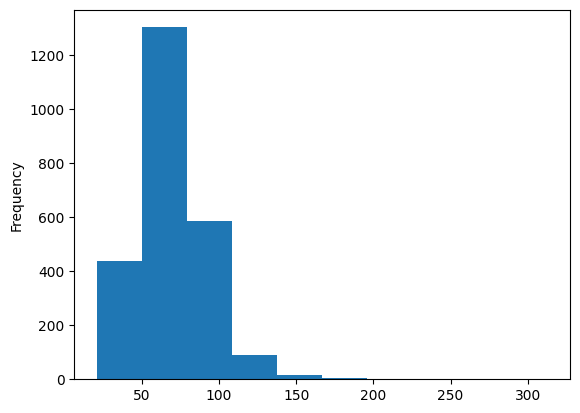

In [39]:
X['Lot Frontage'].plot(kind='hist')

<Axes: xlabel='Lot Frontage'>

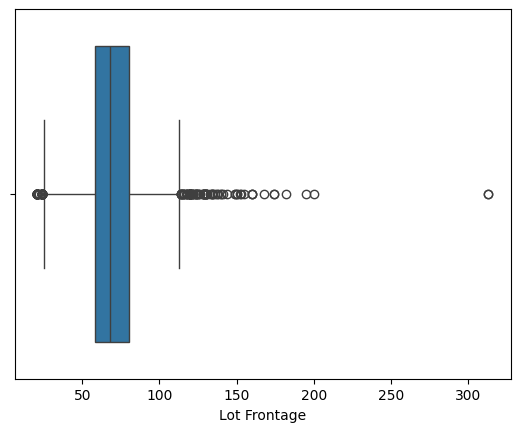

In [40]:
sns.boxplot(X['Lot Frontage'], orient='h')

In [41]:
X['Lot Frontage'].isna().sum()

490

In [44]:
median_lot = X['Lot Frontage'].median()

In [45]:
mean_lot =X['Lot Frontage'].mean()

In [49]:
X['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926     68.0
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64

In [48]:
X['Lot Frontage'].fillna(median_lot, inplace=True)

/var/folders/h8/x2xfqyjs5cl005fb579670gw0000gn/T/ipykernel_86492/332074855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lot Frontage'].fillna(median_lot, inplace=True)


In [50]:
X

,Lot Area,Lot Frontage
0,9189.286836,141.0
1,11622.000000,80.0
2,14267.000000,81.0
3,11160.000000,93.0
4,13830.000000,74.0
...,...,...
2925,7937.000000,37.0
2926,8885.000000,68.0
2927,10441.000000,62.0
2928,10010.000000,77.0


## Standardization 
(xi - mean) / std

mean = 0 and std = 1

In [57]:
(X['Lot Area'] - X['Lot Area'].mean()) / X['Lot Area'].std()

0       0.000000
1       0.765904
2       1.598643
3       0.620450
4       1.461060
          ...   
2925   -0.394264
2926   -0.095800
2927    0.394083
2928    0.258389
2929    0.137808
Name: Lot Area, Length: 2930, dtype: float64

In [52]:
(X['Lot Frontage'] - X['Lot Frontage'].mean()) / X['Lot Frontage'].std()

0       3.375166
1       0.514864
2       0.561754
3       1.124436
4       0.233523
          ...   
2925   -1.501414
2926   -0.047818
2927   -0.329160
2928    0.374193
2929    0.233523
Name: Lot Frontage, Length: 2930, dtype: float64

## normalisation 

In [ ]:
(xi - mean) / x_max - x_min

In [55]:
(X['Lot Area'] - X['Lot Area'].mean()) / (X['Lot Area'].max() - X['Lot Area'].min())

0       0.000000
1       0.148599
2       0.310165
3       0.120378
4       0.283472
          ...   
2925   -0.076494
2926   -0.018587
2927    0.076459
2928    0.050132
2929    0.026737
Name: Lot Area, Length: 2930, dtype: float64

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

In [61]:
x_scaled

array([[ 0.        ,  3.37574168],
       [ 0.76603468,  0.51495179],
       [ 1.59891614,  0.56184998],
       ...,
       [ 0.39415074, -0.32921573],
       [ 0.25843357,  0.3742572 ],
       [ 0.13783107,  0.23356262]])

## 4. Model Building

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test =  train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression   
model = LinearRegression()
model.fit(x_train , y_train )

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
model.coef_, model.intercept_   

(array([23548.12342206, 12189.64777328]), 178836.69458317582)

In [ ]:
y_sales_price = 178836 + (lot_area * 23548) + (lot_frontage * 12189)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [70]:
y_pred = model.predict(x_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
mse

5642979476.453423

In [75]:
mean_absolute_error(y_test, y_pred)

55554.554263839855

In [76]:
r2_score(y_test, y_pred)

0.197234890271216

In [77]:
rmse = np.sqrt(mse)

In [78]:
rmse

75119.76754791925

In [86]:
x_scaled

array([[ 0.        ,  3.37574168],
       [ 0.76603468,  0.51495179],
       [ 1.59891614,  0.56184998],
       ...,
       [ 0.39415074, -0.32921573],
       [ 0.25843357,  0.3742572 ],
       [ 0.13783107,  0.23356262]])

In [109]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6, include_bias=False)
X_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)


In [110]:
model = LinearRegression()
model.fit(X_poly_train , y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
y_pred_poly = model.predict(x_poly_test)

In [112]:
mean_absolute_error(y_test, y_pred_poly)

50796.06646877251

In [113]:
r2_score(y_test, y_pred_poly)

0.30478937209163814

In [114]:
pd.concat()

TypeError: concat() missing 1 required positional argument: 'objs'

In [115]:
X

,Lot Area,Lot Frontage
0,9189.286836,141.0
1,11622.000000,80.0
2,14267.000000,81.0
3,11160.000000,93.0
4,13830.000000,74.0
...,...,...
2925,7937.000000,37.0
2926,8885.000000,68.0
2927,10441.000000,62.0
2928,10010.000000,77.0


In [117]:
data['PID']

0       526301100
1       526350040
2       526351010
3       526353030
4       527105010
          ...    
2925    923275080
2926    923276100
2927    923400125
2928    924100070
2929    924151050
Name: PID, Length: 2930, dtype: int64

In [120]:
pd.concat([X, data['PID']], axis= 1)

,Lot Area,Lot Frontage,PID
0,9189.286836,141.0,526301100
1,11622.000000,80.0,526350040
2,14267.000000,81.0,526351010
3,11160.000000,93.0,526353030
4,13830.000000,74.0,527105010
...,...,...,...
2925,7937.000000,37.0,923275080
2926,8885.000000,68.0,923276100
2927,10441.000000,62.0,923400125
2928,10010.000000,77.0,924100070
